In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [382]:
df=pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [383]:
df.shape

(1310, 14)

In [384]:
df['survived'].value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

In [385]:
df['survived'].value_counts().keys()

Float64Index([0.0, 1.0], dtype='float64')

<BarContainer object of 2 artists>

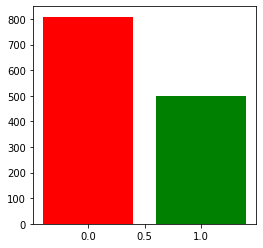

In [386]:
plt.figure(figsize=(4,4))
plt.bar(df['survived'].value_counts().keys(),df['survived'].value_counts(),color=['r','g'])

In [387]:
df['pclass'].value_counts()

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

<BarContainer object of 3 artists>

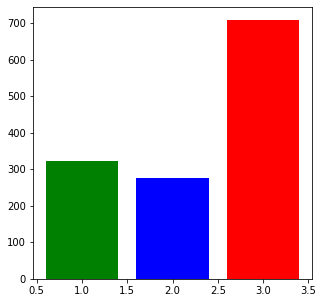

In [388]:
plt.figure(figsize=(5,5))
plt.bar(df['pclass'].value_counts().keys(),df['pclass'].value_counts(),color=['r','g','b'])

In [389]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

<BarContainer object of 2 artists>

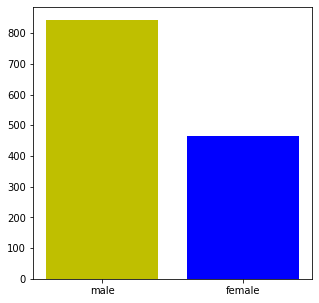

In [390]:
plt.figure(figsize=(5,5))
plt.bar(df['sex'].value_counts().keys(),df['sex'].value_counts(),color=['y','b'])

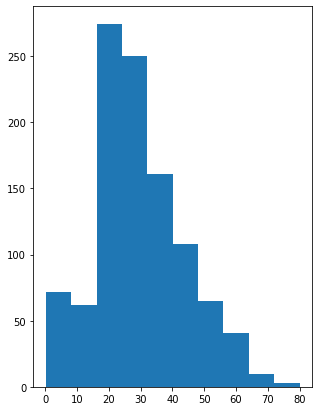

In [391]:
plt.figure(figsize=(5,7))
plt.hist(df['age'])
plt.show()

In [392]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [393]:
df['age']=df['age'].fillna(int(df['age'].mean()))

In [394]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age             0
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [395]:
df['cabin'].isnull().sum()

1015

In [396]:
df['cabin'].value_counts()[0:10]

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
D                  4
F4                 4
C22 C26            4
F2                 4
C78                4
F33                4
B96 B98            4
Name: cabin, dtype: int64

In [397]:
for i in df['cabin'].value_counts()[0:10].keys():
    df['cabin_new']=df['cabin'].fillna(i)

In [398]:
df['cabin_new'].isnull().sum()

0

In [399]:
df['cabin_new'].value_counts()

B96 B98            1019
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
C99                   1
D48                   1
A5                    1
D46                   1
A11                   1
Name: cabin_new, Length: 186, dtype: int64

In [400]:
df['cabin_new']=df['cabin_new'].apply(lambda x:x.split(' ')[0])

In [401]:
df['cabin_new'].value_counts()

B96    1019
F         8
C23       6
B57       5
G6        5
       ... 
A18       1
E58       1
C99       1
D48       1
A11       1
Name: cabin_new, Length: 181, dtype: int64

In [402]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_new
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",B5
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",C22
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C22
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",C22
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C22


In [403]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age             0
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
cabin_new       0
dtype: int64

In [404]:
df['survived']=df['survived'].dropna()

In [405]:
df=df.drop(['cabin'],axis=1)

In [406]:
df['body']=df['body'].fillna(df['body'].mean())

In [407]:
df.isnull().sum()

pclass         1
survived       1
name           1
sex            1
age            0
sibsp          1
parch          1
ticket         1
fare           2
embarked       3
boat         824
body           0
home.dest    565
cabin_new      0
dtype: int64

In [408]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-3.124694e-01,-0.371938,0.060832,0.018322,-0.558629,-1.064472e-02
survived,-0.312469,1.000000e+00,-0.047227,-0.027825,0.082660,0.244265,-1.014861e-15
age,-0.371938,-4.722731e-02,1.000000,-0.190465,-0.128573,0.175419,1.964878e-02
sibsp,0.060832,-2.782512e-02,-0.190465,1.000000,0.373587,0.160238,-2.591925e-02
parch,0.018322,8.265957e-02,-0.128573,0.373587,1.000000,0.221539,1.517702e-02
fare,-0.558629,2.442655e-01,0.175419,0.160238,0.221539,1.000000,-1.063008e-02
body,-0.010645,-1.014861e-15,0.019649,-0.025919,0.015177,-0.010630,1.000000e+00


<AxesSubplot:>

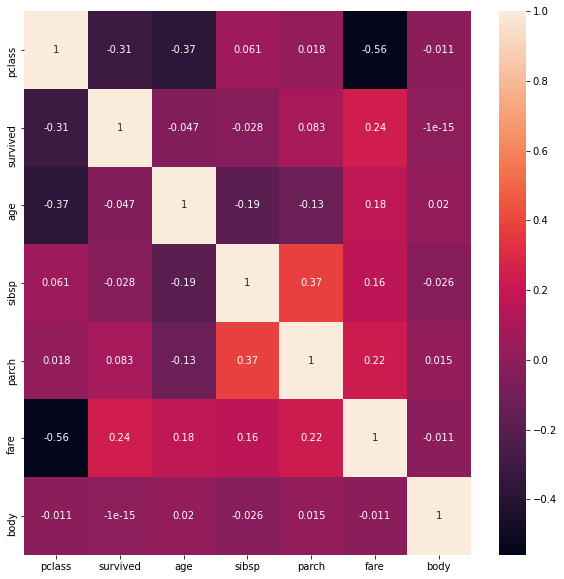

In [409]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [410]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,cabin_new
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,2,160.809917,"St Louis, MO",B5
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,11,160.809917,"Montreal, PQ / Chesterville, ON",C22
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON",C22
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,NaN,135.000000,"Montreal, PQ / Chesterville, ON",C22
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON",C22


In [411]:
df['sex']=pd.get_dummies(df['sex'])

In [412]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,cabin_new
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,29.0000,0.0,0.0,24160,211.3375,S,2,160.809917,"St Louis, MO",B5
1,1.0,1.0,"Allison, Master. Hudson Trevor",0,0.9167,1.0,2.0,113781,151.5500,S,11,160.809917,"Montreal, PQ / Chesterville, ON",C22
2,1.0,0.0,"Allison, Miss. Helen Loraine",1,2.0000,1.0,2.0,113781,151.5500,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON",C22
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1.0,2.0,113781,151.5500,S,NaN,135.000000,"Montreal, PQ / Chesterville, ON",C22
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1.0,2.0,113781,151.5500,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON",C22


In [413]:
df['age']=df['age'].astype('int')

In [414]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,cabin_new
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,29,0.0,0.0,24160,211.3375,S,2,160.809917,"St Louis, MO",B5
1,1.0,1.0,"Allison, Master. Hudson Trevor",0,0,1.0,2.0,113781,151.5500,S,11,160.809917,"Montreal, PQ / Chesterville, ON",C22
2,1.0,0.0,"Allison, Miss. Helen Loraine",1,2,1.0,2.0,113781,151.5500,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON",C22
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0,30,1.0,2.0,113781,151.5500,S,NaN,135.000000,"Montreal, PQ / Chesterville, ON",C22
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25,1.0,2.0,113781,151.5500,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON",C22


In [415]:
df['age']=df['age'].replace(0,1)

In [416]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,cabin_new
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,29,0.0,0.0,24160,211.3375,S,2,160.809917,"St Louis, MO",B5
1,1.0,1.0,"Allison, Master. Hudson Trevor",0,1,1.0,2.0,113781,151.5500,S,11,160.809917,"Montreal, PQ / Chesterville, ON",C22
2,1.0,0.0,"Allison, Miss. Helen Loraine",1,2,1.0,2.0,113781,151.5500,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON",C22
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0,30,1.0,2.0,113781,151.5500,S,NaN,135.000000,"Montreal, PQ / Chesterville, ON",C22
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25,1.0,2.0,113781,151.5500,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON",C22


In [417]:
df['body']=df['body'].astype('int')

In [418]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,cabin_new
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,29,0.0,0.0,24160,211.3375,S,2,160,"St Louis, MO",B5
1,1.0,1.0,"Allison, Master. Hudson Trevor",0,1,1.0,2.0,113781,151.5500,S,11,160,"Montreal, PQ / Chesterville, ON",C22
2,1.0,0.0,"Allison, Miss. Helen Loraine",1,2,1.0,2.0,113781,151.5500,S,NaN,160,"Montreal, PQ / Chesterville, ON",C22
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0,30,1.0,2.0,113781,151.5500,S,NaN,135,"Montreal, PQ / Chesterville, ON",C22
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25,1.0,2.0,113781,151.5500,S,NaN,160,"Montreal, PQ / Chesterville, ON",C22


In [419]:
df['fare']=df['fare'].fillna(df['fare'].mean())

In [420]:
df.fare.isnull().sum()

0

In [421]:
df.corr()

,pclass,survived,sex,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.124617,-0.372541,0.060832,0.018322,-0.558477,-0.011036
survived,-0.312469,1.000000,0.528693,-0.046435,-0.027825,0.082660,0.244208,-0.001990
sex,-0.124617,0.528693,1.000000,-0.055181,0.109609,0.213125,0.185445,0.000978
age,-0.372541,-0.046435,-0.055181,1.000000,-0.190423,-0.128179,0.175336,0.021099
sibsp,0.060832,-0.027825,0.109609,-0.190423,1.000000,0.373587,0.160224,-0.026287
parch,0.018322,0.082660,0.213125,-0.128179,0.373587,1.000000,0.221522,0.014872
fare,-0.558477,0.244208,0.185445,0.175336,0.160224,0.221522,1.000000,-0.010644
body,-0.011036,-0.001990,0.000978,0.021099,-0.026287,0.014872,-0.010644,1.000000


In [447]:
X=df[['sex','fare']]
y=df['survived']

In [448]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [449]:

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [450]:
model.fit(X_train,y_train)

LogisticRegression()

In [451]:
model.predict(X_test)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [452]:
model.score(X_test,y_test)

1.0

In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv('.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
